### Exercises

1\. Download the file "skewed_data_1d.txt" from the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/".
This file contains one column of data. Describe it using corresponding function from the module `scipy.stats`. Analyze its skewness and kurtosis. What can you say about the dataset based on these values? Plot a histogram.

2\. Download the file "multidim_corr.csv" from the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/".
This file contains several columns of data. Plot pairwise scatter plots as well as separated histograms. Compute the correlation matrix. What can you say about the dependencies between the data columns?

3\. Download the file "dirty_data_1d.txt" from the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/".
This file contain a normally distributed data with some contamination. Compute $p$-values for the dataset and remove the outliers whose $p$-values are less then $\alpha=0.001$. Plot histograms for the original and cleaned data.

The distribution has shorter and thinner tails (there are almost no tails) than the normal distribution. The data is slightly asymmetrical with a skew to the left (more values to the left of the mean).


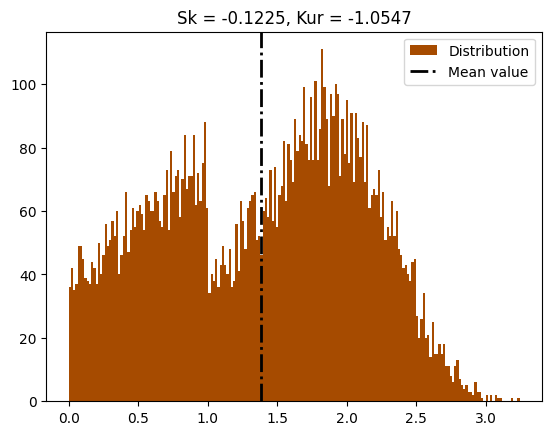

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import scipy as sp

filename = 'skewed_data_1d.txt'
path = 'https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/'
response = requests.get(path + filename)
assert response.status_code == 200
data = response.text[:-1].split('\n')
arr = np.arange(0)
for element in data:
  arr = np.append(arr, float(element))
sk = np.round(sp.stats.skew(arr), 4)
kur = np.round(sp.stats.kurtosis(arr), 4) #  the three has already been subtracted
print('The distribution has shorter and thinner tails (there are almost no tails) than the normal distribution. The data is slightly asymmetrical with a skew to the left (more values to the left of the mean).')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(f'Sk = {sk}, Kur = {kur}')
ax.hist(arr, int(len(arr)/50), color='#A64B00', label='Distribution')
ax.axvline(x=np.mean(arr), color='black', linewidth=2, linestyle='dashdot', label='Mean value')
ax.legend(fontsize=10)
plt.show()

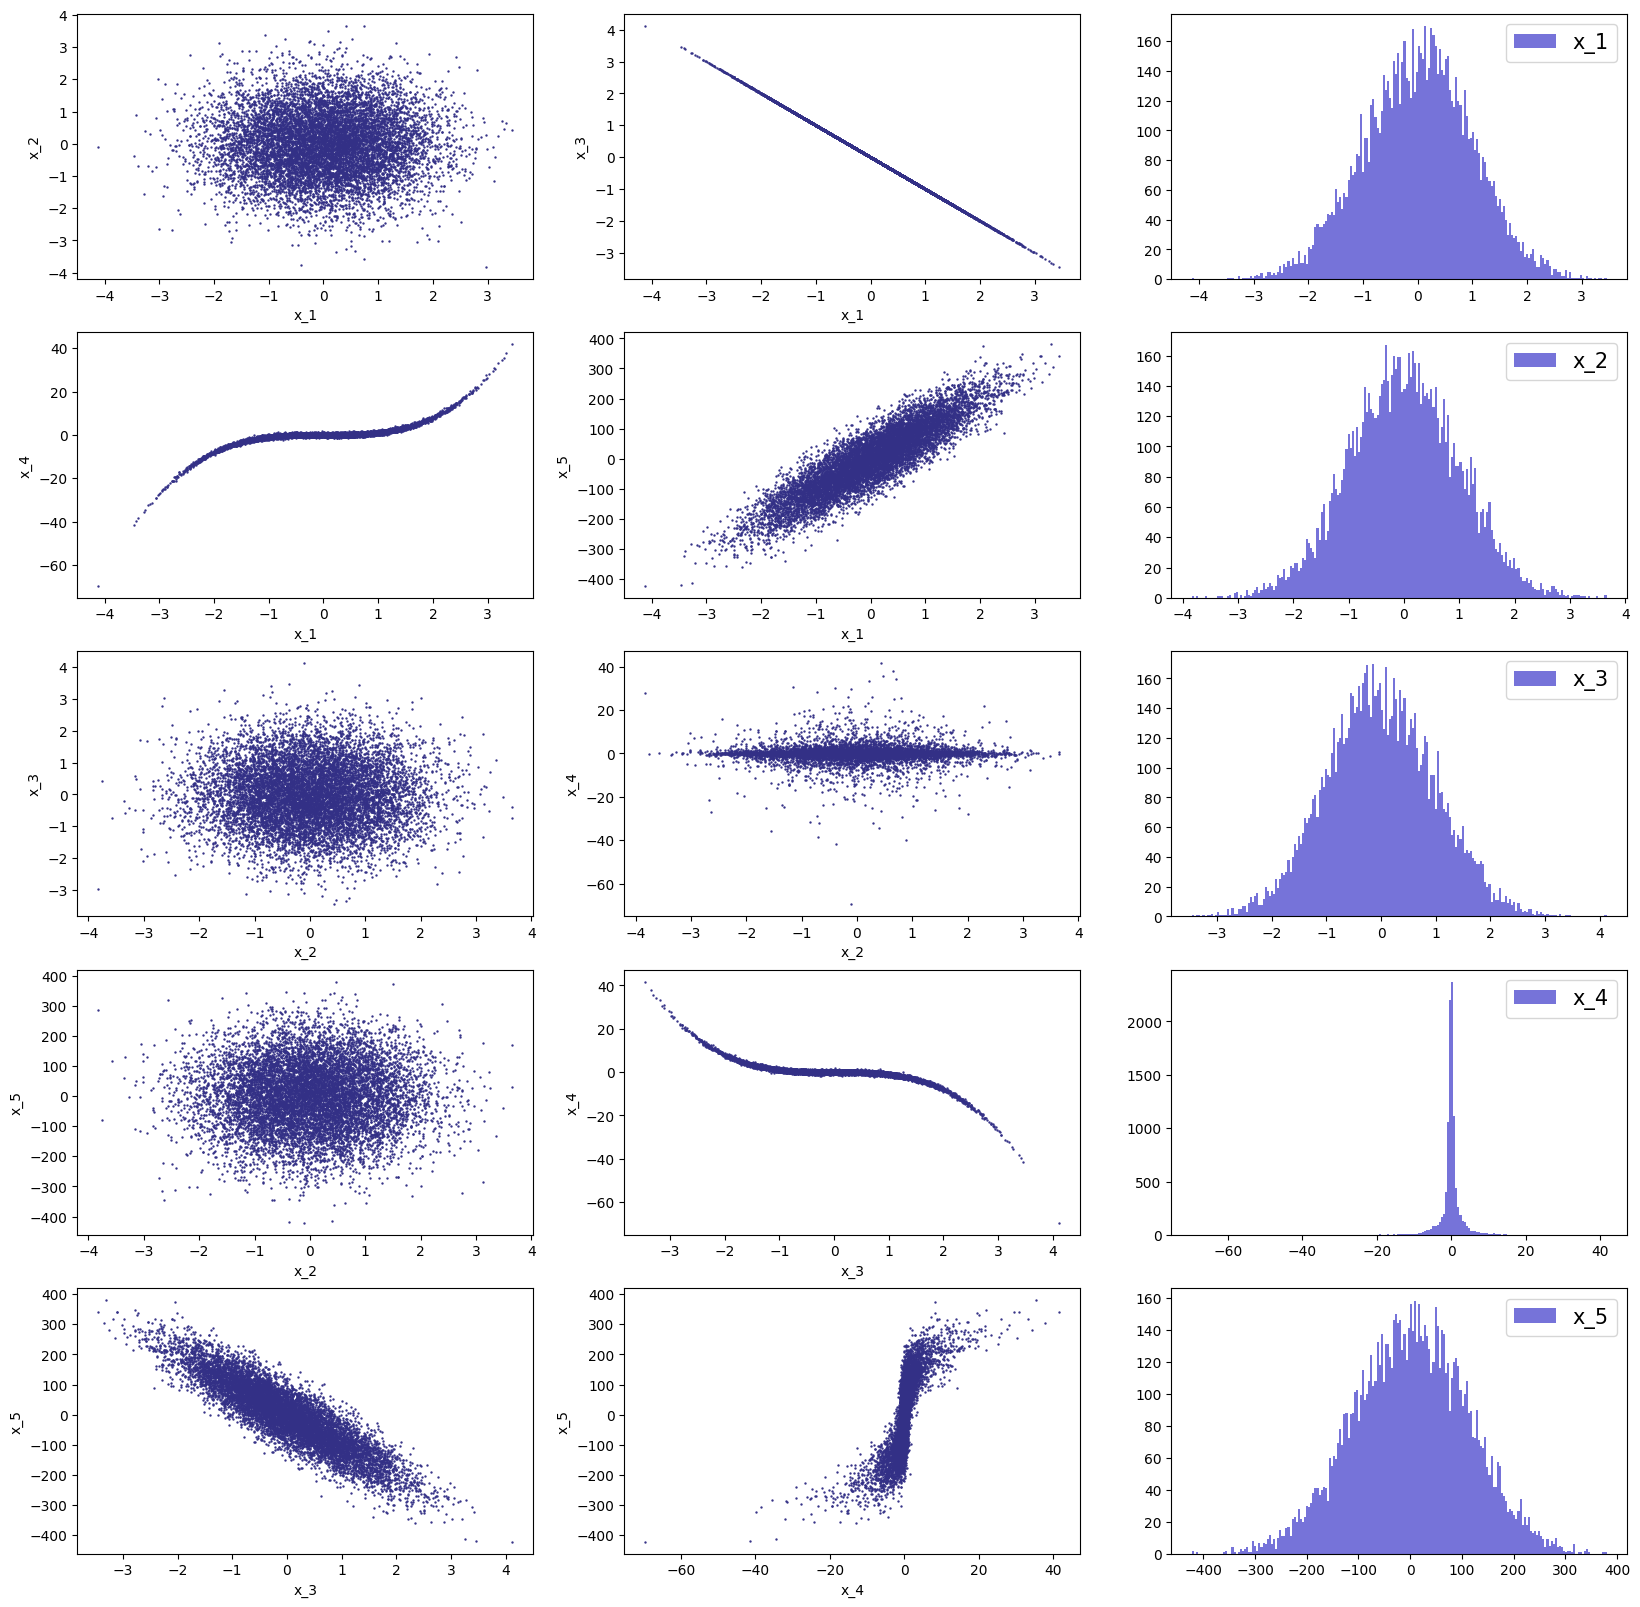

The second column is not correlated with any other
The first column and the third are an explicit linear relationship (x_1 = -k*x_3, k>0)
The fourth column with the first and third has a non-linear but similar relationship (with the opposite sign)


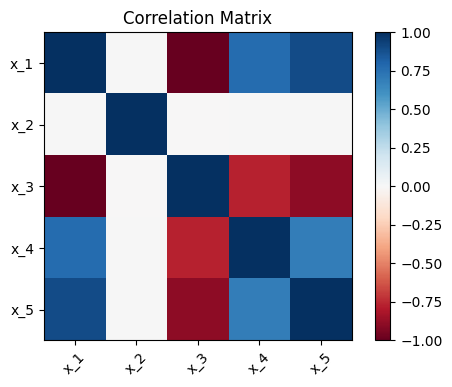

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import scipy as sp
import itertools

filename = 'multidim_corr.csv'
path = 'https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/'
response = requests.get(path + filename)
assert response.status_code == 200
data = response.text.split('\n')[1:-1]
x1, x2, x3, x4, x5 = np.arange(0), np.arange(0), np.arange(0), np.arange(0), np.arange(0)
for row in data:
  x = row.split(',')
  x1 = np.append(x1, float(x[0]))
  x2 = np.append(x2, float(x[1]))
  x3 = np.append(x3, float(x[2]))
  x4 = np.append(x4, float(x[3]))
  x5 = np.append(x5, float(x[4].split('\r')[0]))
arrays = [x1, x2, x3, x4, x5]
labels = ['x_1', 'x_2', 'x_3', 'x_4', 'x_5']
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))
i, j = 0, 0
for combination in itertools.combinations(range(len(arrays)), 2):
  ax[i,j].scatter(arrays[combination[0]], arrays[combination[1]], s=0.5, color='#333086')
  ax[i,j].set_xlabel(labels[combination[0]], fontsize=10)
  ax[i,j].set_ylabel(labels[combination[1]], fontsize=10)
  j += 1
  if j == 2:
    i += 1
    j = 0
for i in range(len(arrays)):
  ax[i, 2].hist(arrays[i], int(len(arrays[i])/50), color='#7673D9', label=labels[i])
  ax[i, 2].legend(fontsize=15)
plt.show()
correlation_matrix = np.corrcoef(arrays)
plt.figure(figsize=(6, 4))
plt.imshow(correlation_matrix, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(5), labels, rotation=45)
plt.yticks(range(5), labels)
print('The second column is not correlated with any other')
print('The first column and the third are an explicit linear relationship (x_1 = -k*x_3, k>0)')
print('The fourth column with the first and third has a non-linear but similar relationship (with the opposite sign)')
plt.show()

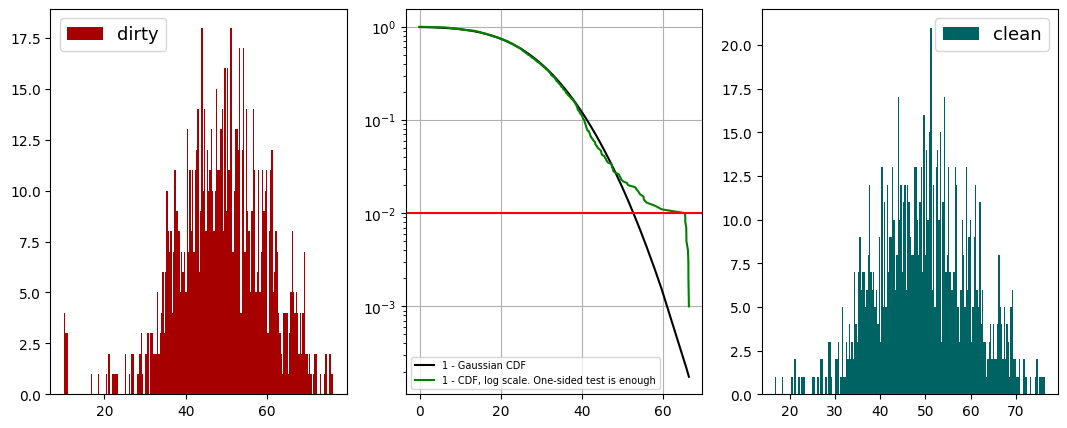

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import ttest_1samp

filename = 'dirty_data_1d.txt'
path = 'https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/'
response = requests.get(path + filename)
assert response.status_code == 200
data = response.text[:-1].split('\n')
arr = np.arange(0)
for element in data:
  arr = np.append(arr, float(element))
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(13, 5))
ax[0].hist(arr, int(len(arr)/5), color='#A60000', label='dirty')
ax[0].legend(fontsize=13)
x = np.sort(np.max(arr) - arr)
m0, s0 = np.mean(x), np.std(x)
ax[1].plot(x, 1 - stats.norm.cdf(x, m0, s0), color='black', label='1 - Gaussian CDF')
ax[1].plot(x, np.linspace(1, 0, len(arr), endpoint=False), label='1 - CDF, log scale. One-sided test is enough', color='g')
ax[1].axhline(0.01, color='r')
ax[1].grid()
ax[1].set_yscale('log')
ax[1].legend(fontsize=7)
p_values = stats.norm.cdf(arr, m0, s0)
indices_to_delete = np.where(p_values <= 1e-1)[0]
arr = np.delete(arr, indices_to_delete)
ax[2].hist(arr, int(len(arr)/5), color='#006363', label='clean')
ax[2].legend(fontsize=13)
plt.show()

4\. In this exercise you will write the program the uses a regular expression to search the text below and extract words beginning with the capital letter. For example two first such words are 'Anglo' and 'Saxon'.

In [ ]:
txt = """Anglo-Saxon Chronicle, chronological account of events in Anglo-Saxon and Norman
England, a compilation of seven surviving interrelated manuscript records that is the primary
source for the early history of England. The narrative was first assembled in the reign of
King Alfred (871–899) from materials that included some epitome of universal history: the
Venerable Bede’s Historia ecclesiastica gentis Anglorum, genealogies, regnal and episcopal lists,
a few northern annals, and probably some sets of earlier West Saxon annals. The compiler also had
access to a set of Frankish annals for the late 9th century. Soon after the year 890 several
manuscripts were being circulated; one was available to Asser in 893, another, which appears
to have gone no further than that year, to the late 10th-century chronicler Aethelweard, while
one version, which eventually reached the north and which is best represented by the surviving
E version, stopped in 892.
"""
import re

capital_words = re.findall(r'\b[A-Z][a-z]+\b', txt)
for word in capital_words:
  print(word)

Anglo
Saxon
Chronicle
Anglo
Saxon
Norman
England
England
The
King
Alfred
Venerable
Bede
Historia
Anglorum
West
Saxon
The
Frankish
Soon
Asser
Aethelweard


5\. In this exercise you will take two verses of the song 'Mary had a little lamb' below and
write the program that uses a regular expression to find all words that go right after the name 'Mary'.
For example the first such word is 'had'

In [ ]:
txt = """Mary had a little lamb,
Little lamb, little lamb,
Mary had a little lamb
Whose fleece was white as snow.

And everywhere that Mary went,
Mary went, Mary went,
Everywhere that Mary went
The lamb was sure to go.
"""

import re

words = re.findall(r'(?<=Mary\s)(\b\w+\b)', txt)
for word in words:
  print(word)

had
had
went
went
went
went


6\. Browse this document above and find the example where an arithmetic expression is substituted with its result.
That program assumes only summation. Modify it to process correctly both addition and subtraction. For example the string '1 + 2' must be substituted with '3' and '4-3' must be substituted with '1'.

In [ ]:
import re

txt = '1 + 2 = 3, 3-4 =1; 7 + 8 = 15,10 - 5 = 5,8-3=5'
pat = r"(\d+)\s*([+-])\s*(\d+)\s*=\s*(-?\d+)[;,]?\s*"
rge = re.compile(pat)
for expression in rge.findall(txt):
    modified_expression = []
    for item in expression:
        modified_item = re.sub(r'\+', 'plus', re.sub(r'-', 'minus', item))
        modified_expression.append(modified_item)
    print(" ".join(modified_expression))
#  Not sure if I get this task correctly

1 plus 2 3
3 minus 4 1
7 plus 8 15
10 minus 5 5
8 minus 3 5


7\. Download the file "rescale.csv" from the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/". Rescale its columns, compute all pairwise distances and find three closest records.

8\. Download the file "happiness_score.csv" from the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/". Rescale its column 'Happiness Score'. Transform its column 'Region' into one-hot representation. Compute pairwise distances using 'Happiness Score' and one-hot columns for 'Region'. Find two most similar countries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import itertools


def rescale(data):
    return (data - np.mean(data)) / np.std(data)


def dist4d(x1, y1, z1, w1, x2, y2, z2, w2):
  return np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2 + (w1 - w2)**2)


filename = 'rescale.csv'
path = 'https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/'
data = requests.get(path + filename)
assert data.status_code == 200
text = data.text.split('\n')[1:-1]
x1, x2, x3, x4 = np.arange(0), np.arange(0), np.arange(0), np.arange(0)
for row in text:
  x = row.split(',')
  x1 = np.append(x1, float(x[0]))
  x2 = np.append(x2, float(x[1]))
  x3 = np.append(x3, float(x[2]))
  x4 = np.append(x5, float(x[3].split('\r')[0]))
x1, x2, x3, x4 = rescale(x1), rescale(x2), rescale(x3), rescale(x4)
combinations, distances, pairwise, combinations_pairwise = [], [], [], []
for combination in itertools.combinations(range(len(x1)), 2):
  combinations_pairwise.append(combination)
  i, j= combination
  pairwise.append(dist4d(x1[i], x2[i], x3[i], x4[i], x1[j], x2[j], x3[j], x4[j]))
for i in range(len(combinations_pairwise)):
  print(f'D[p{combinations_pairwise[i][0] + 1}, p{combinations_pairwise[i][1] + 1}]: {np.round(pairwise[i], 2)}')
for combination in itertools.combinations(range(len(x1)), 3):
  combinations.append(combination)
  i, j, k = combination
  distance1 = dist4d(x1[i], x2[i], x3[i], x4[i], x1[j], x2[j], x3[j], x4[j])
  distance2 = dist4d(x1[i], x2[i], x3[i], x4[i], x1[k], x2[k], x3[k], x4[k])
  distance3 = dist4d(x1[j], x2[j], x3[j], x4[j], x1[k], x2[k], x3[k], x4[k])
  distances.append(distance1 + distance2 + distance3)
np_dist = np.asarray(distances)
min_arg = np.argmin(np_dist)
print(f'Min. dist. between point number {combinations[min_arg][0] + 1}, {combinations[min_arg][1] + 1} and {combinations[min_arg][2] + 1}')

D[p1, p2]: 1.38
D[p1, p3]: 1.76
D[p1, p4]: 1.76
D[p1, p5]: 1.59
D[p1, p6]: 1.45
D[p1, p7]: 2.03
D[p1, p8]: 2.82
D[p1, p9]: 2.91
D[p1, p10]: 2.34
D[p1, p11]: 1.75
D[p1, p12]: 2.38
D[p1, p13]: 2.15
D[p1, p14]: 2.34
D[p1, p15]: 2.47
D[p1, p16]: 1.62
D[p1, p17]: 1.54
D[p1, p18]: 2.63
D[p1, p19]: 2.36
D[p1, p20]: 2.64
D[p1, p21]: 1.79
D[p1, p22]: 1.28
D[p1, p23]: 2.59
D[p1, p24]: 2.11
D[p1, p25]: 2.08
D[p1, p26]: 3.91
D[p1, p27]: 2.4
D[p1, p28]: 2.19
D[p1, p29]: 1.65
D[p1, p30]: 3.16
D[p1, p31]: 1.25
D[p1, p32]: 2.05
D[p1, p33]: 0.7
D[p1, p34]: 2.55
D[p1, p35]: 1.65
D[p1, p36]: 1.65
D[p1, p37]: 1.42
D[p1, p38]: 2.3
D[p1, p39]: 2.67
D[p1, p40]: 1.65
D[p1, p41]: 2.57
D[p1, p42]: 1.76
D[p1, p43]: 1.35
D[p1, p44]: 2.06
D[p1, p45]: 3.55
D[p1, p46]: 2.5
D[p1, p47]: 1.97
D[p1, p48]: 0.65
D[p1, p49]: 2.14
D[p1, p50]: 1.87
D[p1, p51]: 1.11
D[p1, p52]: 0.94
D[p1, p53]: 1.11
D[p1, p54]: 3.61
D[p1, p55]: 2.94
D[p1, p56]: 1.07
D[p1, p57]: 3.2
D[p1, p58]: 3.52
D[p1, p59]: 2.51
D[p1, p60]: 4.19
D[p1, p61]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.preprocessing import OneHotEncoder


def rescale(data):
    return (data - np.mean(data)) / np.std(data)


def one_hot_encode(list):
    unique = np.unique(list)
    encoded = np.zeros((len(list), len(unique)))

    for i, value in enumerate(list):
        index = np.where(unique == value)[0][0]
        encoded[i][index] = 1

    return encoded


filename = 'happiness_score.csv'
path = 'https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/'
data = requests.get(path + filename)
assert data.status_code == 200
text = data.text.split('\n')[1:-1]
country, region = [], []
val = np.arange(0)
for row in text:
  x = row.split(',')
  country.append(x[0])
  region.append(x[1])
  val = np.append(val, float(x[2].split('\r')[0]))
rescaled_scores = rescale(val)
region_one_hot = one_hot_encode(region)

pairwise_distances = []
for i in range(len(region)): #  Another approach, without itertools
    dist_list = [abs(rescaled_scores[i] - rescaled_scores[j]) + sum([abs(region_one_hot[i][k] - region_one_hot[j][k]) for k in range(len(set(region)))]) for j in range(len(region))]
    pairwise_distances.append(dist_list)

pairwise_distances = np.array(pairwise_distances)

# Step 5: Find the two most similar countries
np.fill_diagonal(pairwise_distances, np.inf)
min_indices = np.unravel_index(np.argmin(pairwise_distances), pairwise_distances.shape)
most_similar_countries = (country[min_indices[0]], country[min_indices[1]])
print('The two most similar countries are:', most_similar_countries)

The two most similar countries are: ('Burkina Faso', 'Uganda')
